# 나이브 베이스 분류기(Naive Bayes Classification)

* 베이즈 정리를 적용한 확률적 분류 알고리즘
* 모든 특성들이 독립임을 가정 (naive 가정)
* 입력 특성에 따라 3개의 분류기 존재
  * 가우시안 나이브 베이즈 분류기
  * 베르누이 나이브 베이즈 분류기
  * 다항 나이브 베이즈 분류기

## 나이브 베이즈 분류기의 확률 모델

* 나이브 베이즈는 조건부 확률 모델 가지고 만들어짐
* *N*개의 특성을 나타내는 벡터 **x**를 입력 받아 k개의 가능한 확률적 결과를 출력

\begin{equation}
p(C_k | x_1,...,x_n)
\end{equation}

* 위의 식에 베이즈 정리를 적용하면 다음과 같음

\begin{equation}
p(C_k | \textbf{x}) = \frac{p(C_k)p(\textbf{x}|C_k)}{p(\textbf{x})}
\end{equation}

* 위의 식에서 분자만이 출력 값에 영향을 받기 때문에 분모 부분을 상수로 취급할 수 있음

\begin{equation}
\begin{split}
p(C_k | \textbf{x}) & \propto p(C_k)p(\textbf{x}|C_k) \\
& \propto p(C_k, x_1, ..., x_n)
\end{split}
\end{equation}

* 위의 식을 연쇄 법칙을 사용해 다음과 같이 쓸 수 있음

\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & = p(C_k)p(x_1, ..., x_n | C_k) \\
& = p(C_k)p(x_1 | C_k)p(x_2, ..., x_n | C_k, x_1) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)p(x_3, ..., x_n | C_k, x_1, x_2) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)...p(x_n | C_k, x_1, x_2, ..., x_{n-1})
\end{split}
\end{equation}

* 나이브 베이즈 분류기는 모든 특성이 독립이라고 가정하기 때문에 위의 식을 다음과 같이 쓸 수 있음

\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & \propto p(C_k)p(x_1|C_k)p(x_2|C_k)...p(x_n|C_k) \\
& \propto p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{split}
\end{equation}

* 위의 식을 통해 나온 값들 중 가장 큰 값을 갖는 클래스가 예측 결과

\begin{equation}
\hat{y} = \underset{k}{\arg\max} \; p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{equation}

In [ ]:
import numpy as np
import pandas as pd

 

# 나이브베이즈의 핵심 작동원리
 * 각 클래스에 대한 가능도 (likelihood) 비교를 통한 분류
 * 즉 likelihood에 대한 이해가 가장 핵심적
 * 사실상 베이즈 정리의 철학을 기반으로 작동하는 분류기

# 베이즈 정리 
 * 새로운 정보를 토대로 어떤 사건이 발생했다는 주자엥 대한 신뢰도를 갱신해 나가는 방법
 * 사전지식을 이용한 분류 prior :기존에 알고있던 확률
 * likelihood : 특정 정보가 추가되는경우 : 키 정보만으로 성별을 구분할경우
 확률분포에서 정보에 대한 가능성
 * likelihood는 추가 정보이기 때문에 기존에 알고 있던 사전 지식(PRIOR)에 추가 정보(likelihood)를 얹어주는 방식으로 판단근거를 찾는 것이 더욱 바람직함
 * 즉 판단근거 = 사전지식 * 추가정보
 * 수식으로 쓰면 
  - 남자라고 판단할 근거 :p(성별 =남자) * P(키 =175 |성별 =남자)
  - 여자라고 판단할 근거 :p(성별 =여자) * P(키 =175 |성별 =여자)

 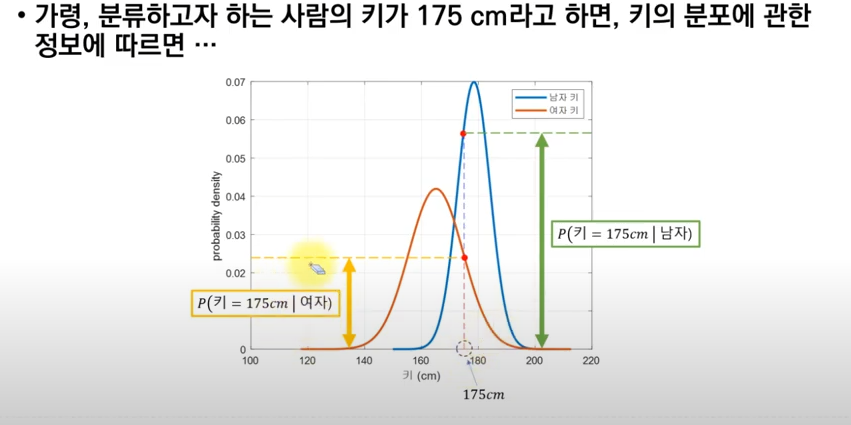
 

 * 가령 몸무게에 관한 정보가 추가된다면 사전정보에 추가 정보를 곱해주었던것 처럼 그 뒤에 계속 추가 정보를 덧 붙일수 있다. 
 * test data 사람의 몸무게가 80kg였다면 

  - 남자라고 판단할 근거 :p(성별 =남자) * P(키 =175 |성별 =남자) * p(몸무게 =80 |성별 =남자)
  - 여자라고 판단할 근거 :p(성별 =여자) * P(키 =175 |성별 =여자) * p(몸무게 =80 |성별 =여자)
  * 작동방식은 train 데이터에서 클래스별 비율을 계산하여 미리 사전확률을 계산함
  * 클래스별 feature의 분포를 추정한후 
  * prior 에 liklihood를 계속 곱해주어 가장 값이 큰 클로스로 분류됨

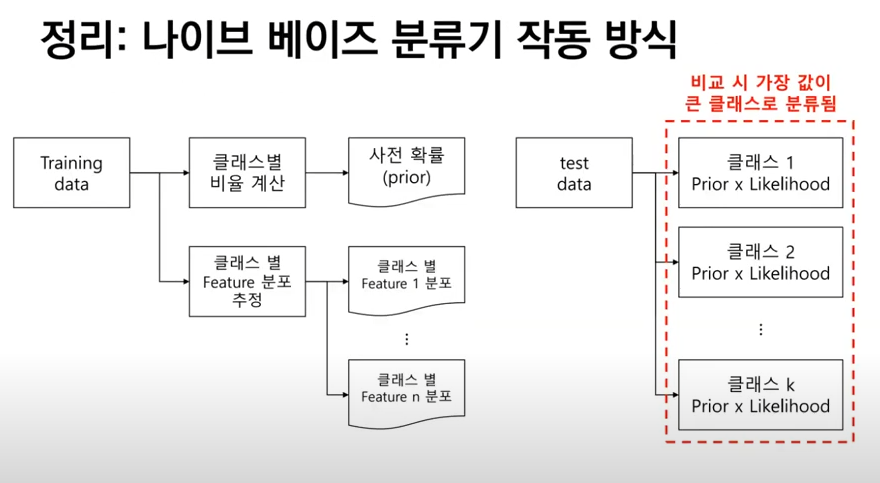

## 산림 토양 데이터
* 산림 지역 토양의 특징 데이터
* 토양이 어떤 종류에 속하는지 예측
* https://archive.ics.uci.edu/ml/datasets/Covertype 에서 데이터의 자세한 설명 확인 가능

In [ ]:
covtype =  

In [ ]:
pd.DataFrame(covtype.data)

In [ ]:
covtype.target  

### 학습, 평가 데이터 분류

In [ ]:
print('전체 데이터 크기 {}'.format(covtype_X.shape))
print('학습 데이터 크기 {}'.format(covtype_X_train.shape))
print('평가 데이터 크기 {}'.format(covtype_X_test.shape))

### 전처리

#### 전처리 전 데이터

#### 전처리 과정

#### 전처리 후 데이터
* 평균은 0에 가깝게, 표준평차는 1에 가깝게 정규화

## 20 Newsgroup 데이터
* 뉴스 기사가 어느 그룹에 속하는지 분류
* 뉴스 기사는 텍스트 데이터이기 때문에 특별한 전처리 과정이 필요

### 학습, 평가 데이터 분류

### 벡터화
* 텍스트 데이터는 기계학습 모델에 입력 할 수 없음
* 벡터화는 텍스트 데이터를 실수 벡터로 변환해 기계학습 모델에 입력 할 수 있도록 하는 전처리 과정
* Scikit-learn에서는 Count, Tf-idf, Hashing 세가지 방법을 지원

#### CountVectorizer
* 문서에 나온 단어의 수를 세서 벡터 생성

데이터를 희소 행렬 형태로 표현

#### HashingVectorizer
* 각 단어를 해쉬 값으로 표현
* 미리 정해진 크기의 벡터로 표현

#### TfidfVectorizer
* 문서에 나온 단어 빈도(term frequency)와 역문서 빈도(inverse document frequency)를 곱해서 구함
* 각 빈도는 일반적으로 로그 스케일링 후 사용
* $tf(t, d) = log(f(t, d) + 1)$
* $idf(t, D) = \frac{|D|}{|d \in D : t \in d| + 1}$
* $tfidf(t, d, D) = tf(t, d) \times idf(t, D)$

## 가우시안 나이브 베이즈

* 입력 특성이 가우시안(정규) 분포를 갖는다고 가정

## 베르누이 나이브 베이즈

* 입력 특성이 베르누이 분포에 의해 생성된 이진 값을 갖는 다고 가정

### 학습 및 평가 (Count)

### 학습 및 평가 (Hash)

### 학습 및 평가 (Tf-idf)

### 시각화

## 다항 나이브 베이즈

* 입력 특성이 다항분포에 의해 생성된 빈도수 값을 갖는 다고 가정

### 학습 및 평가 (Count)

### 학습 및 평가 (Tf-idf)

### 시각화